# Indices Multidimensionales en Python

## P1

In [1]:
import rtree
import random
import time
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from tabulate import tabulate

def generar_puntos_aleatorios(n, d):
    puntos = []
    for _ in range(n):
        punto = [random.uniform(0, 100) for _ in range(d)]
        puntos.append(punto)
    return puntos

def calcular_tiempo_promedio_knn(n, d):
    puntos = generar_puntos_aleatorios(n, d)
    
    # Configurar el índice en memoria RAM
    prop = rtree.index.Property()
    prop.dimension = d
    idx = rtree.index.Index(properties=prop, interleaved=True)
    
    # Insertar los puntos en el índice
    for i, punto in enumerate(puntos):
        idx.insert(i, punto)
    
    # Realizar búsqueda KNN y calcular el tiempo promedio
    k = 8
    tiempo_total = 0
    for _ in range(10):  # Realizar 10 repeticiones y promediar el tiempo
        consulta_punto = [random.uniform(0, 100) for _ in range(d)]
        start_time = time.time()
        list(idx.nearest(consulta_punto, k))
        tiempo_total += time.time() - start_time
    
    tiempo_promedio = tiempo_total / 10
    return tiempo_promedio

n_values = [10**2, 10**3, 10**4, 10**5, 10**6]
d_values = [2**1, 2**2, 2**3, 2**4, 2**5]

table_data = []
for n in n_values:
    row = [f"N={n}"]
    for d in d_values:
        tiempo_promedio = calcular_tiempo_promedio_knn(n, d)
        row.append(f"{tiempo_promedio:.6f}")
    table_data.append(row)

headers = [""] + [f"D={d}" for d in d_values]
table = tabulate(table_data, headers, tablefmt="grid")
print(table)

# Crear las matrices de valores para el gráfico de dispersión
N, D = np.meshgrid(n_values, d_values)
T = np.array(table_data)[:, 1:].astype(float).flatten()

# Crear el gráfico de dispersión
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(np.log10(N.flatten()), np.log2(D.flatten()), T, cmap='viridis')
ax.set_xlabel('Log10(N)')
ax.set_ylabel('Log2(D)')
ax.set_zlabel('Tiempo (segundos)')
plt.title('Rendimiento del R-tree con búsqueda KNN')
plt.show()


ModuleNotFoundError: No module named 'rtree'

+-----------+----------+----------+----------+---------+----------+
|           |      D=2 |      D=4 |      D=8 |    D=16 |     D=32 |
+===========+==========+==========+==========+=========+==========+
| N=100     | 0.000703 | 0.0005   | 0.001097 | 0.0007  | 0.000903 |
+-----------+----------+----------+----------+---------+----------+
| N=1000    | 0.005197 | 0.007699 | 0.0069   | 0.006   | 0.007103 |
+-----------+----------+----------+----------+---------+----------+
| N=10000   | 0.0594   | 0.092796 | 0.085096 | 0.0761  | 0.0811   |
+-----------+----------+----------+----------+---------+----------+
| N=100000  | 0.551899 | 0.563996 | 0.601201 | 0.6672  | 0.7787   |
+-----------+----------+----------+----------+---------+----------+
| N=1000000 | 5.7035   | 6.2586   | 6.92138  | 7.94128 | 8.97256  |
+-----------+----------+----------+----------+---------+----------+


C:\Users\ASUS\AppData\Local\Temp\ipykernel_29336\206615133.py:61: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(np.log10(N.flatten()), np.log2(D.flatten()), T, cmap='viridis')


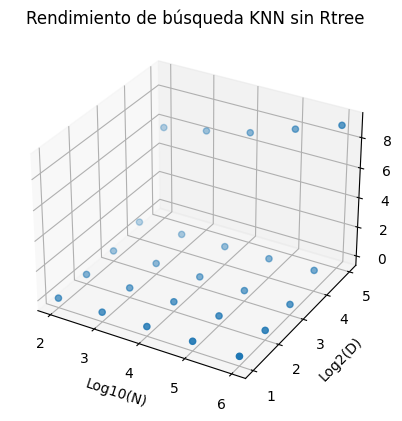

In [ ]:
#Búsqueda sin índice
import random
import time
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from tabulate import tabulate

def generar_puntos_aleatorios(n, d):
    puntos = []
    for _ in range(n):
        punto = [random.uniform(0, 100) for _ in range(d)]
        puntos.append(punto)
    return puntos

def calcular_distancia(p1, p2):
    return np.linalg.norm(np.array(p1) - np.array(p2))

def buscar_knn(puntos, consulta_punto, k):
    distancias = [(i, calcular_distancia(p, consulta_punto)) for i, p in enumerate(puntos)]
    distancias.sort(key=lambda x: x[1])
    return [i for i, _ in distancias[:k]]

def calcular_tiempo_promedio_knn(n, d):
    puntos = generar_puntos_aleatorios(n, d)
    
    # Realizar búsqueda KNN y calcular el tiempo promedio
    k = 8
    tiempo_total = 0
    for _ in range(10):  # Realizar 10 repeticiones y promediar el tiempo
        consulta_punto = [random.uniform(0, 100) for _ in range(d)]
        start_time = time.time()
        buscar_knn(puntos, consulta_punto, k)
        tiempo_total += time.time() - start_time
    
    tiempo_promedio = tiempo_total / 10
    return tiempo_promedio

n_values = [10**2, 10**3, 10**4, 10**5, 10**6]
d_values = [2**1, 2**2, 2**3, 2**4, 2**5]

table_data = []
for n in n_values:
    row = [f"N={n}"]
    for d in d_values:
        tiempo_promedio = calcular_tiempo_promedio_knn(n, d)
        row.append(f"{tiempo_promedio:.6f}")
    table_data.append(row)

headers = [""] + [f"D={d}" for d in d_values]
table = tabulate(table_data, headers, tablefmt="grid")
print(table)

# Crear las matrices de valores para el gráfico de dispersión
N, D = np.meshgrid(n_values, d_values)
T = np.array(table_data)[:, 1:].astype(float).flatten()

# Crear el gráfico de dispersión
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(np.log10(N.flatten()), np.log2(D.flatten()), T, cmap='viridis')
ax.set_xlabel('Log10(N)')
ax.set_ylabel('Log2(D)')
ax.set_zlabel('Tiempo (segundos)')
plt.title('Rendimiento de búsqueda KNN sin Rtree')
plt.show()


Fin
